In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = {'country': ['B', 'C', 'D', 'E', 'F', 'G', 'H'
                   ], 'Q': [80, 150, 135, 165, 95, 130, 110], 
        'L': [60, 100, 100, 120, 70, 90, 80], 
        'K': [50, 100, 80, 100, 60, 80, 70]}
thq2 = pd.DataFrame(data, columns = ['country', 'Q', 'L', 'K'])

In [3]:
thq2

,country,Q,L,K
0,B,80,60,50
1,C,150,100,100
2,D,135,100,80
3,E,165,120,100
4,F,95,70,60
5,G,130,90,80
6,H,110,80,70


In [4]:
thq2.mean()

Q    123.571429
L     88.571429
K     77.142857
dtype: float64

In [5]:
thq2.var()

Q    914.285714
L    414.285714
K    357.142857
dtype: float64

In [6]:
thq2.std()

Q    30.237158
L    20.354010
K    18.898224
dtype: float64

In [7]:
thq2.median()

Q    130.0
L     90.0
K     80.0
dtype: float64

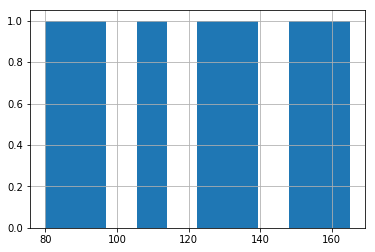

In [8]:
thq2['Q'].hist()

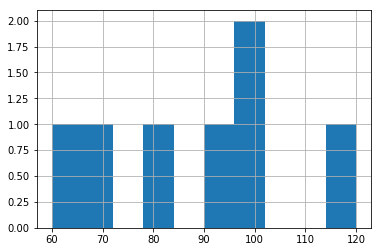

In [9]:
thq2['L'].hist()

In [10]:
thq2['log_value_Q'] = np.log(thq2['Q'])
thq2['log_value_L'] = np.log(thq2['L'])
thq2['log_value_K'] = np.log(thq2['K'])
print (thq2)

  country    Q    L    K  log_value_Q  log_value_L  log_value_K
0       B   80   60   50     4.382027     4.094345     3.912023
1       C  150  100  100     5.010635     4.605170     4.605170
2       D  135  100   80     4.905275     4.605170     4.382027
3       E  165  120  100     5.105945     4.787492     4.605170
4       F   95   70   60     4.553877     4.248495     4.094345
5       G  130   90   80     4.867534     4.499810     4.382027
6       H  110   80   70     4.700480     4.382027     4.248495


In [11]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

In [12]:
X = thq2[['log_value_L', 'log_value_K']]
Y = thq2['log_value_Q']
regr = linear_model.LinearRegression()
lm = regr.fit(X,Y)


In [13]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 0.14623321175616866
Coefficients: 
 [0.54842747 0.50874094]


In [14]:
import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
Y_pred = regr.predict(X)
residual = Y - Y_pred
residual

0    0.000136
1   -0.004038
2    0.004123
3   -0.008718
4   -0.005309
5    0.024166
6   -0.010360
Name: log_value_Q, dtype: float64

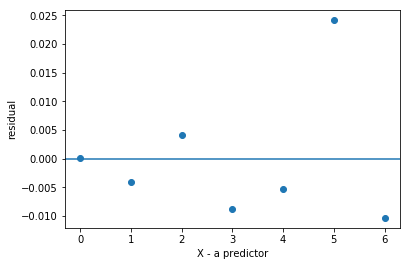

In [16]:
index = [0,1,2,3,4,5,6]
plt.plot(residual, 'o')
plt.xlabel("X - a predictor")
plt.ylabel("residual")
plt.axhline(y=0)

In [17]:
R=regr.score(X,Y)
R

0.9979175612132033

In [18]:
n= 7; p=2
AR=1-(1-R)*(n-1)/(n-p-1)
print ("adjusted R square is", AR)

adjusted R square is 0.996876341819805
